In [2]:
from math import *
from random import *
import sys
from time import sleep
import collections
import subprocess as sp
import os
from numpy import fromfile
from numpy import sin,pi
from os import system


%matplotlib inline
from matplotlib import pyplot as plt

In [65]:
import numpy as np

In [3]:
from time import time

In [23]:
params=[1,     # rulemod-0-1
        3,     # repscheme=0-4
        1,     # selection=0-2 
        8,     # nlog2p0
        8,     # nlog2pmut
        2,     # nloglog2p1
        16384, # initial1density
        32768] # initialrdensity


params = [str(x) for x in params]

execstr = 'actgenelife '+' '.join(params)
execstr

'actgenelife 1 3 1 8 8 2 16384 32768'

In [24]:
# actgenelife must be compiled with
# cc -o actgenelife actgenelife.c

proc = sp.Popen(execstr,
                shell=True,
                stdout = sp.PIPE)

In [25]:
# transient
start = time()
for i in range(100):
    dat = proc.stdout.readline()
print (time()-start)/100

0.0263127207756


In [26]:
activity = {}
dat = proc.stdout.readline()
dat = dat.split()
ldat = len(dat)
fofo = range(0,ldat,2)          # swizzle data to graph: idx of beginning of each data chunk
actinc = {}

In [27]:
nsteps = 1000
start = time()
for j in range(nsteps):
    dat = proc.stdout.readline()
    dat = dat.split()
    ldat = len(dat)
    fofo = range(0,ldat,2)          # swizzle data to graph: idx of beginning of each data chunk
    for i in range(len(fofo)):
        mykey = dat[fofo[i]]
        if mykey in activity:
            if activity[mykey] != None:
                activity[mykey] += int(dat[fofo[i]+1])
            else:
                activity[mykey] = int(dat[fofo[i]+1])
        else:
            activity[mykey] = int(dat[fofo[i]+1])
        actinc[dat[fofo[i]]] = 1
    dat = [(dat[fofo[i]],int(dat[fofo[i]+1])) for i in range(len(fofo))]

print time()-start

5.05202794075


In [28]:
[(kk,activity[kk]) for kk in [activity.keys()[i] for i in range(10)]]


[('dd6ff2818d731f54', 1),
 ('fb21bd329065d12a', 1),
 ('b789f17d20f7b44d', 1),
 ('37e301d41ac4e3c6', 197),
 ('dbdb876c717a3021', 109),
 ('7d0cf3e0bda56606', 207),
 ('73289d2c80210789', 466),
 ('cb8c99d2160a2f08', 63),
 ('ca5e8dba27a3f3df', 1),
 ('9ce1644f168d5a05', 6)]

In [42]:
def docount(act):
    cnt = 0
    for aa in act:
        cnt = cnt+act[aa]
    return(cnt)

In [43]:
cnt = docount(activity)

65529790

In [93]:

def doact(params,nsteps = 1000, ntrans=200, niter = 4):

    params = [str(x) for x in params]
    execstr = 'actgenelife '+' '.join(params)
    proc = sp.Popen(execstr,
                    shell=True,
                    stdout = sp.PIPE)
    activity = {}
    for i in range(ntrans):         # do the transient
        dat = proc.stdout.readline()
    totcnt = 0
    cnt = []
    delt = []
    for k in range(niter):
        for j in range(nsteps):
            dat = proc.stdout.readline()
            dat = dat.split()
            ldat = len(dat)
            fofo = range(0,ldat,2)          # swizzle data to graph: idx of beginning of each data chunk
            for i in range(len(fofo)):
                mykey = dat[fofo[i]]
                if mykey in activity:
                    if activity[mykey] != None:
                        activity[mykey] += int(dat[fofo[i]+1])
                    else:
                        activity[mykey] = int(dat[fofo[i]+1])
                else:
                    activity[mykey] = int(dat[fofo[i]+1])
                actinc[dat[fofo[i]]] = 1
            dat = [(dat[fofo[i]],int(dat[fofo[i]+1])) for i in range(len(fofo))]
        tmpcnt = totcnt
        totcnt = docount(activity)
        cnt = cnt + [totcnt-tmpcnt]  #totcnt-tmpcnt is total for this chunk
        if k>0:
            delt = delt + [cnt[k]-cnt[k-1]]
        sys.stdout.write('\r'+str(k)+' of '+ str(niter-1))
    return(delt)

In [94]:
params

['0', '3', '1', '8', '8', '2', '16384', '32768']

In [95]:
params[0] = '0'

In [96]:
params

['0', '3', '1', '8', '8', '2', '16384', '32768']

Let $a^t$ be the activity profile at time $t$,
$$
a^t_c = \sum_i \delta(c,C^t_i)
$$
where $C^t_i =$ counts of the $i^{\rm th}$ species.

Then let $A^t$ be the total activity at time $t$,
$$
A^t = \sum_c a^t_c
$$
and let $A^t_{\delta t}$ be $A^t$ integrated over a time period $\delta t$,
$$
A^t_{\delta t} = \sum_{u \in \{t-\delta t , \dots , t\}} A^u
$$
We then ask how this total activity over a period $\delta t$ changes from one period to another, by looking at
$$
\Delta^t = A^t_{\delta t} - A^{t-\delta t}_{\delta t}
$$
This may be interpreted as the "new activity".  If negative, the total activity per $\delta t$ has decreased.

The graphs below graph new activity $\Delta^t$ vs. $t$, for $\delta t = 200$.

## rulemod=0

No affect of genes on dynamics.

Activity dynamics due solely to gene replication / mutation events



24 of 24

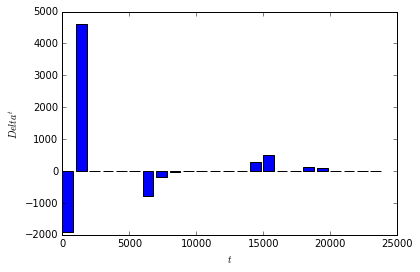

In [111]:
params=[0,     # rulemod-0-1
        3,     # repscheme=0-4
        1,     # selection=0-2 
        8,     # nlog2p0
        8,     # nlog2pmut
        2,     # nloglog2p1
        16384, # initial1density
        32768] # initialrdensity
act = doact(params,nsteps=200,niter=25)
xx = range(len(act))
xx = [x*nsteps for x in xx]
ww = [0.8*nsteps for x in xx]
plt.bar(xx,act,ww);
plt.ylabel(r'$Delta^t$')
plt.xlabel(r'$t$')
plt.show()

In [112]:
def doplot(act):
    xx = range(len(act))
    xx = [x*nsteps for x in xx]
    ww = [0.8*nsteps for x in xx]
    plt.bar(xx,act,ww);
    plt.ylabel(r'$\Delta^t$')
    plt.xlabel(r'$t$')
    plt.show()

24 of 24

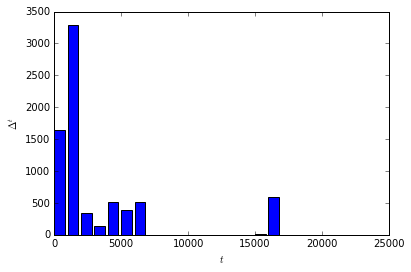

In [113]:
params=[0,     # rulemod-0-1
        3,     # repscheme=0-4
        1,     # selection=0-2 
        12,     # nlog2p0
        12,     # nlog2pmut
        2,     # nloglog2p1
        16384, # initial1density
        32768] # initialrdensity
act = doact(params,nsteps=200,niter=25)
doplot(act)

### Sweep repscheme

24 of 24

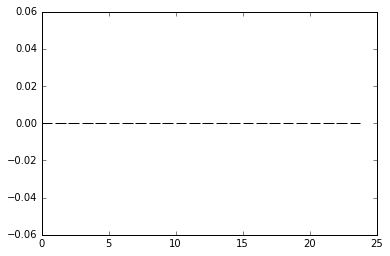

In [102]:
params=[1,     # rulemod-0-1
        0,     # repscheme=0-4
        1,     # selection=0-2 
        12,     # nlog2p0
        12,     # nlog2pmut
        2,     # nloglog2p1
        16384, # initial1density
        32768] # initialrdensity
act = doact(params,nsteps=200,niter=25)
plt.bar(range(len(act)),act);

24 of 24

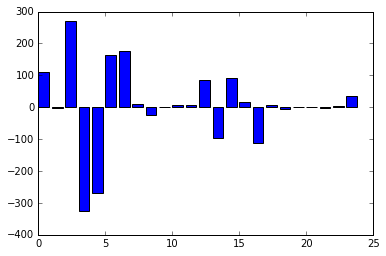

In [103]:
params=[1,     # rulemod-0-1
        1,     # repscheme=0-4
        1,     # selection=0-2 
        12,     # nlog2p0
        12,     # nlog2pmut
        2,     # nloglog2p1
        16384, # initial1density
        32768] # initialrdensity
act = doact(params,nsteps=200,niter=25)
plt.bar(range(len(act)),act);

24 of 24

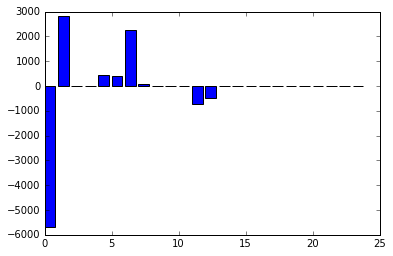

In [104]:
params=[1,     # rulemod-0-1
        2,     # repscheme=0-4
        1,     # selection=0-2 
        12,     # nlog2p0
        12,     # nlog2pmut
        2,     # nloglog2p1
        16384, # initial1density
        32768] # initialrdensity
act = doact(params,nsteps=200,niter=25)
plt.bar(range(len(act)),act);

24 of 24

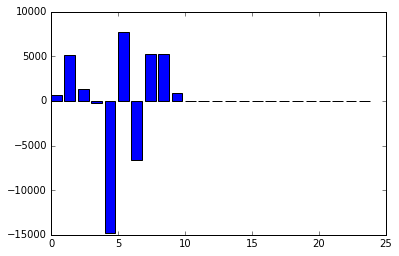

In [105]:
params=[1,     # rulemod-0-1
        3,     # repscheme=0-4
        1,     # selection=0-2 
        12,     # nlog2p0
        12,     # nlog2pmut
        2,     # nloglog2p1
        16384, # initial1density
        32768] # initialrdensity
act = doact(params,nsteps=200,niter=25)
plt.bar(range(len(act)),act);

24 of 24

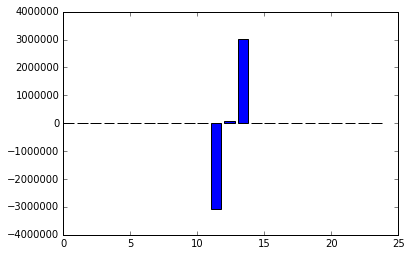

In [106]:
params=[1,     # rulemod-0-1
        4,     # repscheme=0-4
        1,     # selection=0-2 
        12,     # nlog2p0
        12,     # nlog2pmut
        2,     # nloglog2p1
        16384, # initial1density
        32768] # initialrdensity
act = doact(params,nsteps=200,niter=25)
plt.bar(range(len(act)),act);